### **Hamiltonian Construction Using Pauli Terms**

In this section, we construct the Hamiltonian for a quantum system consisting of two spin chains and a central witness spin. Each spin interacts with an external magnetic field and exhibits spin-spin interactions within and between the chains.

#### **System Overview**

The system is composed of:

- **Chain 1**: A sequence of $N_1$ spins.
- **Chain 2**: A sequence of $N_2$ spins.
- **Central Witness Spin**: Denoted as $\sigma_0$, this spin interacts with both Chain 1 and Chain 2.

The total number of qubits (or spins) in the system is given by:


$N = N_1 + N_2 + 1$

where the extra $1$ accounts for the central witness spin $\sigma_0$.

---

### **Magnetic Field Terms**

Each spin in the system experiences a **Zeeman interaction** with an external magnetic field. This interaction is represented by the Pauli-Z ($S_z$) operator acting on each spin. The contributions to the Hamiltonian from the magnetic field are as follows:

1. **Chain 1**: Each spin in Chain 1 interacts with the magnetic field according to:


$\mathbf{H}_{\text{field,1}} = - g_1 \mu_B H \sum_{n=1}^{N_1} S_{1,n}^z$

where $g_1$ is the coupling constant for Chain 1, $\mu_B$ is the Bohr magneton, and $H$ is the external magnetic field strength.

2. **Chain 2**: Each spin in Chain 2 experiences a similar interaction:


$\mathbf{H}_{\text{field,2}} = - g_2 \mu_B H \sum_{n=1}^{N_2} S_{2,n}^z$

where $g_2$ is the coupling constant for Chain 2.

3. **Witness Spin**: The central witness spin $\sigma_0$ interacts with the magnetic field as follows:

$\mathbf{H}_{\text{field,0}} = - g_0 \mu_B H \sigma_0^z$

where $g_0$ is the coupling constant for the witness spin.

---

### **Spin-Spin Interaction Terms**

Spins within each chain also interact with their nearest neighbors through **exchange interactions**. These interactions are described by the Pauli-X ($S_x$) and Pauli-Y ($S_y$) operators. The contributions to the Hamiltonian from these interactions are:

1. **Chain 1 Interactions**: Nearest-neighbor spins within Chain 1 interact according to:

$\mathbf{H}_{\text{int,1}} = - J_1 \sum_{n=1}^{N_1-1} \left( S_{1,n}^x S_{1,n+1}^x + S_{1,n}^y S_{1,n+1}^y \right)$

where $J_1$ is the interaction strength within Chain 1, and the terms $S_x$ and $S_y$ describe the spin-spin couplings in the x and y directions.

2. **Chain 2 Interactions**: Spins within Chain 2 interact similarly, with the addition of **periodic boundary conditions**:


$\mathbf{H}_{\text{int,2}} = - J_2 \sum_{n=1}^{N_2-1} \left( S_{2,n}^x S_{2,n+1}^x + S_{2,n}^y S_{2,n+1}^y \right)]$

where $J_2$ is the interaction strength within Chain 2, and the periodic boundary conditions wrap the interaction from the last spin in Chain 2 back to the first.

---

### **Interaction with the Central Witness Spin**

The central witness spin $\sigma_0$ interacts with specific spins in both Chain 1 and Chain 2. These interactions are represented by the Pauli-Z operator acting on the witness spin and the spins it interacts with.

1. **Interaction with Chain 1**: The witness spin interacts with a specified spin in Chain 1:


$\mathbf{H}_{\text{int,0-1}} = - J_0 \sigma_0^z S_{1,\text{connected}}^z$

where $J_0$ is the coupling constant between the witness spin and the connected spin in Chain 1.

2. **Interaction with Chain 2**: The witness spin also interacts with both the **first** and **last** spins in Chain 2:


$\mathbf{H}_{\text{int,0-2}} = - J_0 \sigma_0^z \left( S_{2,1}^z + S_{2,N_2}^z \right)$


This ensures that the witness spin mediates interactions between the two chains.

---

### **Final Hamiltonian**

The total Hamiltonian for the system, incorporating the magnetic field interactions, the spin-spin interactions, and the coupling between the witness spin and the chains, is:


$\mathbf{H} = \mathbf{H}_{\text{field,1}} + \mathbf{H}_{\text{field,2}} + \mathbf{H}_{\text{field,0}} + \mathbf{H}_{\text{int,1}} + \mathbf{H}_{\text{int,2}} + \mathbf{H}_{\text{int,0-1}} + \mathbf{H}_{\text{int,0-2}}$

This Hamiltonian governs the quantum dynamics of the entire system, describing how the spins evolve under the influence of the external field and their mutual interactions. 

---

### **Why Use SparsePauliOp?**

In Qiskit, we use the **`SparsePauliOp`** to represent the Hamiltonian efficiently. This is essential because quantum systems grow exponentially in size as the number of qubits increases. By storing only the non-trivial elements of the Hamiltonian, we reduce both the memory usage and computation time when simulating the system. 

Each term in the Hamiltonian is represented as a Pauli string (e.g., $S_z$, $S_x S_y$, etc.) acting on specific qubits, allowing us to construct the full Hamiltonian in a scalable manner.

In [ ]:
from qiskit.quantum_info import SparsePauliOp

# Define the Hamiltonian in Pauli terms
def get_hamiltonian_pauli_terms(N1, N2, J1, J2, J0, g1, g2, g0, H_field, connected_spin_index=2):
    N = N1 + N2 + 1  # Total number of qubits (including witness spin)
    pauli_terms = []
    
    # Chain 1 magnetic field terms
    for n in range(N1):
        pauli_string = ['I'] * N
        pauli_string[n] = 'Z'
        pauli_terms.append((''.join(pauli_string), -g1 * H_field))
        
    # Chain 2 magnetic field terms
    for n in range(N2):
        idx = N1 + 1 + n  # Chain 2 indices start after witness spin
        pauli_string = ['I'] * N
        pauli_string[idx] = 'Z'
        pauli_terms.append((''.join(pauli_string), -g2 * H_field))
        
    # Witness spin magnetic field term
    pauli_string = ['I'] * N
    pauli_string[N1] = 'Z'  # Witness spin at index N1
    pauli_terms.append((''.join(pauli_string), -g0 * H_field))
        
    # Spin-spin interaction terms for Chain 1
    for n in range(N1 - 1):
        # X interactions
        pauli_string = ['I'] * N
        pauli_string[n] = 'X'
        pauli_string[n + 1] = 'X'
        pauli_terms.append((''.join(pauli_string), -J1))
        # Y interactions
        pauli_string = ['I'] * N
        pauli_string[n] = 'Y'
        pauli_string[n + 1] = 'Y'
        pauli_terms.append((''.join(pauli_string), -J1))
        
    # Spin-spin interaction terms for Chain 2 with periodic boundary conditions
    for n in range(N2):
        idx1 = N1 + 1 + n
        idx2 = N1 + 1 + (n + 1) % N2  # Wrap around for periodic boundary conditions
        # X interactions
        pauli_string = ['I'] * N
        pauli_string[idx1] = 'X'
        pauli_string[idx2] = 'X'
        pauli_terms.append((''.join(pauli_string), -J2))
        # Y interactions
        pauli_string = ['I'] * N
        pauli_string[idx1] = 'Y'
        pauli_string[idx2] = 'Y'
        pauli_terms.append((''.join(pauli_string), -J2))
        
    # Witness spin interaction with specified spin in Chain 1
    pauli_string = ['I'] * N
    pauli_string[N1] = 'Z'  # Witness spin
    pauli_string[connected_spin_index] = 'Z'  # Specified spin in Chain 1
    pauli_terms.append((''.join(pauli_string), -J0))
    
    # Witness spin interaction with first and last spins of Chain 2
    for idx in [N1 + 1, N1 + N2]:
        pauli_string = ['I'] * N
        pauli_string[N1] = 'Z'  # Witness spin
        pauli_string[idx] = 'Z'
        pauli_terms.append((''.join(pauli_string), -J0))
    
    # Convert to SparsePauliOp
    labels, coefficients = zip(*pauli_terms)
    hamiltonian = SparsePauliOp(labels, coeffs=coefficients)
    
    return hamiltonian

In [ ]:
# System parameters
N1, N2 = 5, 4
g1, g2, g0 = 1.0, 1.0, 1.0
H_field = 1.0
J1, J2, J0 = 1.0, 1.0, 1.0

# Get Hamiltonian
pauli_op = get_hamiltonian_pauli_terms(N1, N2, J1, J2, J0, g1, g2, g0, H_field)
pauli_op

SparsePauliOp(['ZIIIIIIIII', 'IZIIIIIIII', 'IIZIIIIIII', 'IIIZIIIIII', 'IIIIZIIIII', 'IIIIIIZIII', 'IIIIIIIZII', 'IIIIIIIIZI', 'IIIIIIIIIZ', 'IIIIIZIIII', 'XXIIIIIIII', 'YYIIIIIIII', 'IXXIIIIIII', 'IYYIIIIIII', 'IIXXIIIIII', 'IIYYIIIIII', 'IIIXXIIIII', 'IIIYYIIIII', 'IIIIIIXXII', 'IIIIIIYYII', 'IIIIIIIXXI', 'IIIIIIIYYI', 'IIIIIIIIXX', 'IIIIIIIIYY', 'IIIIIIXIIX', 'IIIIIIYIIY', 'IIZIIZIIII', 'IIIIIZZIII', 'IIIIIZIIIZ'],
              coeffs=[-1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j,
 -1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j,
 -1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j,
 -1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j])

### **Eigenvalue Calculation Using SciPy**

In this section, we compute the eigenvalues of the Hamiltonian using exact diagonalization with SciPy's `eigh` function. This approach is feasible because the system is relatively small, allowing us to perform exact diagonalization without excessive computational cost. 

It’s important to do this when the system is small to ensure that we know what the correct eigenvalues are. This can serve as a benchmark to validate whether the Hamiltonian has been constructed correctly. If there are any doubts about the correctness of the Hamiltonian, you can compare the eigenvalues with those obtained using classical methods such as the Jordan-Wigner transformation or other analytical approaches.

The primary goal here is to use this exact solution to compare the results obtained from quantum hardware later, ensuring consistency and accuracy between classical simulations and quantum computations. 

Quantum eigenvalues (sorted): [-15.19845659 -15.19845659 -14.23606798 -14.23606798 -13.96238861
 -13.96238861 -13.80400786 -13.80400786 -13.         -13.        ]
Degenerate eigenstates found between the following eigenvalue indices:
Eigenvalue 1 and Eigenvalue 2 are degenerate.
Eigenvalue 3 and Eigenvalue 4 are degenerate.
Eigenvalue 5 and Eigenvalue 6 are degenerate.
Eigenvalue 7 and Eigenvalue 8 are degenerate.
Eigenvalue 9 and Eigenvalue 10 are degenerate.
Eigenvalue 11 and Eigenvalue 12 are degenerate.
Eigenvalue 13 and Eigenvalue 14 are degenerate.
Eigenvalue 15 and Eigenvalue 16 are degenerate.
Eigenvalue 17 and Eigenvalue 18 are degenerate.
Eigenvalue 19 and Eigenvalue 20 are degenerate.
Eigenvalue 20 and Eigenvalue 21 are degenerate.
Eigenvalue 21 and Eigenvalue 22 are degenerate.
Eigenvalue 23 and Eigenvalue 24 are degenerate.
Eigenvalue 24 and Eigenvalue 25 are degenerate.
Eigenvalue 25 and Eigenvalue 26 are degenerate.
Eigenvalue 27 and Eigenvalue 28 are degenerate.
Eigenva

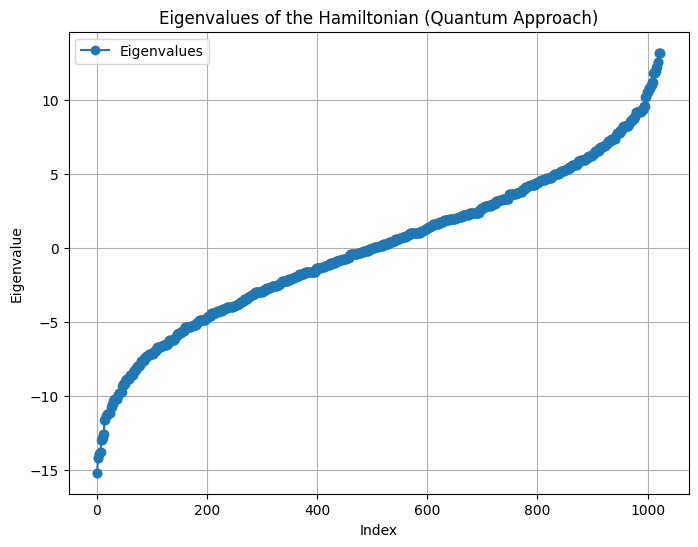

In [ ]:
from scipy.linalg import eigh
import matplotlib.pyplot as plt
import numpy as np

# Convert SparsePauliOp to matrix
pauli_ham = pauli_op.to_matrix()

# Compute the eigenvalues using SciPy's eigh function directly on the matrix
eigenvalues, _ = eigh(pauli_ham)

# Sort eigenvalues to compare with classical results
eigenvalues = np.sort(eigenvalues)
print("Quantum eigenvalues (sorted):", eigenvalues[:10])

# Check for degeneracies (similar to classical)
degenerate_pairs = []
for i in range(len(eigenvalues)-1):
    if np.isclose(eigenvalues[i], eigenvalues[i+1], atol=1e-6):
        degenerate_pairs.append((i, i+1))

if degenerate_pairs:
    print(f"Degenerate eigenstates found between the following eigenvalue indices:")
    for pair in degenerate_pairs:
        print(f"Eigenvalue {pair[0]+1} and Eigenvalue {pair[1]+1} are degenerate.")
else:
    print("No degenerate eigenstates found within the tolerance.")

# Plot the sorted eigenvalues
plt.figure(figsize=(8, 6))
plt.plot(eigenvalues, 'o-', label='Eigenvalues')
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues of the Hamiltonian (Quantum Approach)')
plt.legend()
plt.grid(True)
plt.show()

In this section, we use the Variational Quantum Eigensolver (VQE), a popular hybrid quantum-classical algorithm, to find the ground state energy of the Hamiltonian. VQE is commonly used in quantum computing to approximate the minimum eigenvalue of a system's Hamiltonian by optimizing a parameterized quantum circuit (ansatz) with a classical optimizer. Here, we define a TwoLocal ansatz and use the COBYLA optimizer to minimize the energy, ultimately computing the system's ground state energy.

In [ ]:
from qiskit.circuit.library import TwoLocal, EvolvedOperatorAnsatz
from qiskit_algorithms.optimizers import COBYLA, ADAM, SPSA

# Define the ansatz
N_qubits = N1 + N2 + 1
# ansatz = TwoLocal(num_qubits=N_qubits, rotation_blocks=['ry', 'rz'], entanglement_blocks='cx', reps=1)
ansatz = EvolvedOperatorAnsatz(pauli_op)
# Optimizer
optimizer = SPSA(maxiter=2000)

In [ ]:
from qiskit.primitives import Estimator
from qiskit_algorithms import VQE

# VQE with Estimator primitive
estimator = Estimator()
vqe = VQE(estimator, ansatz, optimizer)

# Find the minimum eigenvalue (ground state energy)
vqe_result = vqe.compute_minimum_eigenvalue(pauli_op)
print("Ground state energy: ", vqe_result.eigenvalue.real)

/var/folders/1t/dx5zswn17y58r7kqkt5gw0nm0000gn/T/ipykernel_19762/4127989289.py:5: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()


Ground state energy:  -12.999999999999993



In this section, we do something very similar to the previous one, but now we run the Variational Quantum Eigensolver (VQE) on an actual quantum computer using IBM Quantum services. We prepare the same ansatz and optimizer, but we execute the VQE on the 'ibm_kyiv' quantum backend.

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
# from token_1 import token

# Save IBM account credentials
QiskitRuntimeService.save_account(token, channel='ibm_quantum', overwrite=True)

# Load the account and initialize the service
service = QiskitRuntimeService()


NameError: name 'token' is not defined

In [ ]:
import time
from qiskit_ibm_runtime import Session

# Define ansatz and optimizer again for VQE execution on hardware
from qiskit.circuit.library import TwoLocal
from qiskit_algorithms.optimizers import SPSA

# Redefine ansatz and optimizer for hardware execution
N_qubits = N1 + N2 + 1
ansatz = TwoLocal(num_qubits=N_qubits, rotation_blocks=['ry', 'rz'], entanglement_blocks='cx', reps=5)
optimizer = SPSA(maxiter=2000)

# Set up the Estimator and VQE
print("Setting up the VQE solver.")
estimator = Estimator()
vqe = VQE(estimator, ansatz, optimizer)

# Select the 'ibm_kyiv' backend
print("Selecting the 'ibm_kyiv' backend.")
backend = service.backend('ibm_kyiv')

# Run the VQE on IBM quantum hardware
print("Starting the VQE execution. This may take some time, please be patient...")
start_time = time.time()

with Session(service=service, backend=backend):
    try:
        vqe_result = vqe.compute_minimum_eigenvalue(pauli_op)
        end_time = time.time()
        print("VQE execution completed successfully!")
        print(f"Ground state energy: {vqe_result.eigenvalue.real}")
    except Exception as e:
        print(f"An error occurred during the VQE execution: {e}")

total_time = end_time - start_time
print(f"Total execution time: {total_time:.2f} seconds")


Setting up the VQE solver.
Selecting the 'ibm_kyiv' backend.


/var/folders/1t/dx5zswn17y58r7kqkt5gw0nm0000gn/T/ipykernel_14805/2197763412.py:15: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()


Starting the VQE execution. This may take some time, please be patient...


/var/folders/1t/dx5zswn17y58r7kqkt5gw0nm0000gn/T/ipykernel_14805/2197763412.py:26: DeprecationWarning: The service parameter is deprecated as of qiskit-ibm-runtime 0.26.0 and will be removed no sooner than 3 months after the release date. The service can be extracted from the backend object so it is no longer necessary.
  with Session(service=service, backend=backend):


VQE execution completed successfully!
Ground state energy: -14.618415779936878
Total execution time: 262.01 seconds
